# xT

Expected Threat is a new concept that will introduce the level of threat a pass, prior to a goal, brought. Click [here](https://alpscode.com/blog/expected_threat_optimization/) to understand more about it.

In [1]:
from statsbombpy import sb
import numpy
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
comp= sb.competitions()

credentials were not supplied. open data access only


In [3]:
matches = sb.matches(11,90)

credentials were not supplied. open data access only


Atlético Madrid v Barcelona (2020/2021) on the 21/11/2020. 

ESPN claim that ["Barca captain Lionel Messi had a match to forget, creating very little danger"](https://www.espn.com/soccer/report/_/gameId/582103).

Let's see how Messi performed through his xT during the match.

In [4]:
events = sb.events(3773656)

credentials were not supplied. open data access only


In [5]:
df = events[['id','team','player','position','pass_recipient','minute', 'second',
                    'type', 'location', 'pass_end_location', 'pass_outcome',
                   ]]

For missing values, use missingno library

<AxesSubplot:>

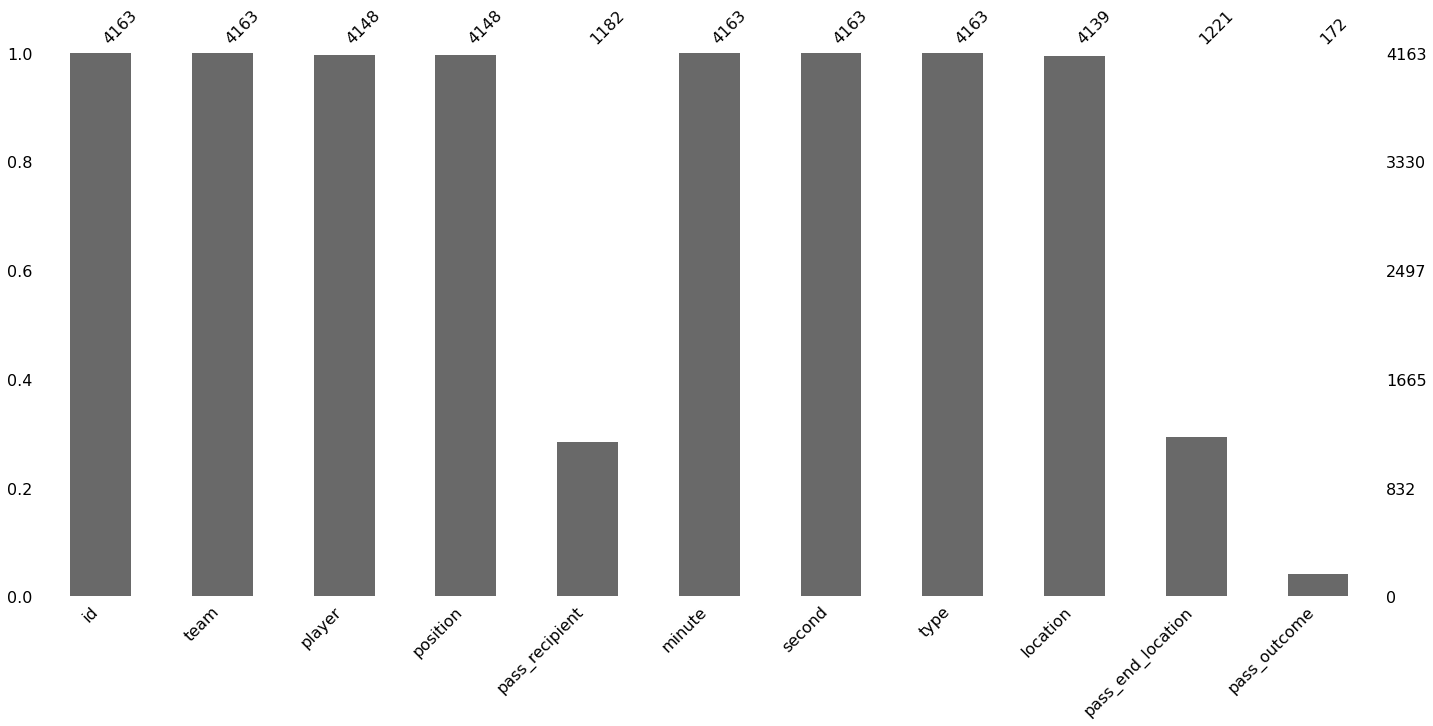

In [39]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df)

In [44]:
def get_passes(df):
    df['x'] = [i[0] for i in df['location'].values]
    df['y'] = [i[1] for i in df['location'].values]
    df['endX'] = [i[0] for i in df['pass_end_location'].values]
    df['endY'] = [i[1] for i in df['pass_end_location'].values]
    df.drop(['location', 'pass_end_location'], axis =1)
    return df

In [7]:
passes = df[df['type'] == 'Pass']

In [9]:
barca_pass = passes[passes['team'] == 'Barcelona'] 

In [22]:
messi_tot = barca_pass[barca_pass['player'] == 'Lionel Andrés Messi Cuccittini']

In [23]:
print(f"Messi made a total of {len(messi_tot)} regardless of if successful or not.") 

Messi made a total of 56 regardless of if successful or not.


In [24]:
messi_tot['pass_outcome'] = messi_tot['pass_outcome'].fillna('Nice')

In [47]:
messi_suc = messi_tot[messi_tot['pass_outcome'] == 'Nice']

In [28]:
print(f"Messi attempted 56 passes and 40 of them are successful which is {round(len(messi)/len(messi_tot), 2)} %")

Messi attempted 56 passes and 40 of them are successful which is 0.71 %


Let's see the total expected threat of those 40 passes

In [48]:
messi_suc = get_passes(messi_suc)

In [53]:
messi_suc = messi_suc.drop(['location', 'pass_end_location'], axis = 1)

In [61]:
import socceraction.xthreat as xthreat
import socceraction.spadl as spadl

In [64]:
spadl.play_left_to_right()

TypeError: play_left_to_right() missing 2 required positional arguments: 'actions' and 'home_team_id'